In [1]:
#Fetching raw HTML content from given URL

In [95]:
import requests
from bs4 import BeautifulSoup
url = 'https://www.imdb.com/title/tt0111161/reviews/'
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
response = requests.get(url, headers=headers)
if response.status_code == 200:
    html_data = response.text
    print("Data fetched successfully")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

Data fetched successfully


In [97]:
# Parse the raw HTML content using BeautifulSoup

In [103]:
soup = BeautifulSoup(html_data, 'html.parser')
reviews = soup.find_all('article',class_='sc-f53ace6f-1 cHwTOl user-review-item')
review_texts = [review.get_text() for review in reviews]
review_texts = [review.get_text() for review in reviews]
for review in review_texts:
    print(review)

10/10Some birds aren't meant to be caged.SpoilerhitchcockthelegendJul 23, 2010Permalink
10/10An incredible movie. One that lives with you.It is no wonder that the film has such a high rating, it is quite literally breathtaking. What can I say that hasn't said before? Not much, it's the story, the acting, the premise, but most of all, this movie is about how it makes you feel. Sometimes you watch a film, and can't remember it days later, this film loves with you, once you've seen it, you don't forget.The ultimate story of friendship, of hope, and of life, and overcoming adversity.I understand why so many class this as the best film of all time, it isn't mine, but I get it. If you haven't seen it, or haven't seen it for some time, you need to watch it, it's amazing. 10/10.Sleepin_DragonFeb 16, 2021Permalink
10/10Don't Rent Shawshank.I'm trying to save you money; this is the last film title that you should consider borrowing. Renting Shawshank will cost you five bucks... just plunk down t

In [105]:
#Data cleaning and Preprocessing

In [107]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
nltk.download('stopwords')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def clean_review_text(text):
    text = BeautifulSoup(text, 'html.parser').get_text()
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    tokens = text.split()
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    cleaned_text = ' '.join(tokens)
    return cleaned_text

cleaned_reviews = [clean_review_text(review) for review in review_texts]

for review in cleaned_reviews[:5]:
    print(review)

bird arent meant cagedspoilerhitchcockthelegendjul permalink
incredible movie one life youit wonder film high rating quite literally breathtaking say hasnt said much story acting premise movie make feel sometimes watch film cant remember day later film love youve seen dont forgetthe ultimate story friendship hope life overcoming adversityi understand many class best film time isnt mine get havent seen havent seen time need watch amazing sleepindragonfeb permalink
dont rent shawshankim trying save money last film title consider borrowing renting shawshank cost five buck plunk title youll wind going back gem time time one movie truly timeless entertaining moving matter many time view itforget others including might suggest youll discover shawshank redemption watch youll identify something personal life scene character moment uncomplicated movie need hope youll look shawshank want believe overcoming even greatest obstacle shawshank uplift way cant find movie today liken film kind spiritua

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
C:\Users\dell\AppData\Local\Temp\ipykernel_11532\1417917738.py:12: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


In [109]:
#Exploratory data analysis

In [111]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud

In [113]:
nltk.download('punkt_tab')
nltk.download('punkt')
nltk.download('stopwords')
tokens = [word_tokenize(review.lower()) for review in cleaned_reviews]
all_tokens = [token for sublist in tokens for token in sublist]

stop_words = set(stopwords.words('english'))
clean_tokens = [token for token in all_tokens if token.isalpha() and token not in stop_words]

fdist = FreqDist(clean_tokens)

print(fdist.most_common(10))

[('film', 64), ('movie', 56), ('shawshank', 36), ('permalink', 25), ('one', 25), ('best', 21), ('time', 21), ('hope', 19), ('story', 15), ('get', 14)]


[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [115]:
#Plotting 10 most frequent words

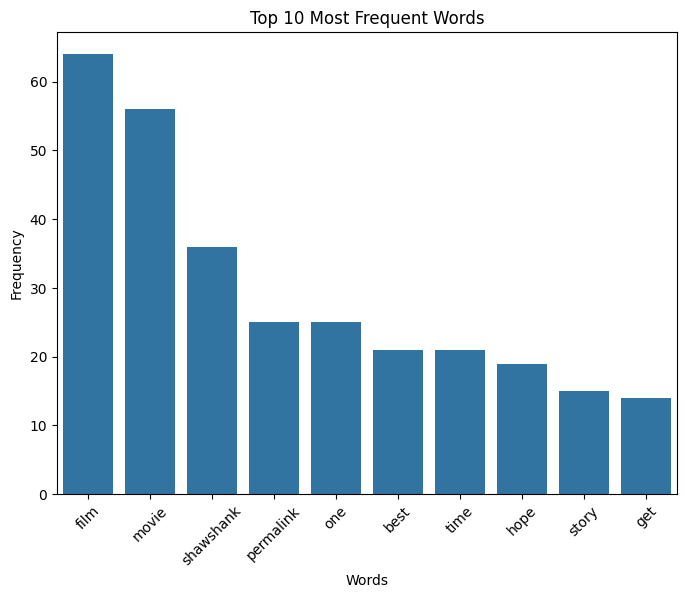

In [117]:
import matplotlib.pyplot as plt
import seaborn as sns

top_words = fdist.most_common(10)
words, counts = zip(*top_words)

plt.figure(figsize=(8, 6))
sns.barplot(x=list(words), y=list(counts))
plt.title('Top 10 Most Frequent Words')
plt.xticks(rotation=45)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [119]:
#Creating word cloud for frequent terms

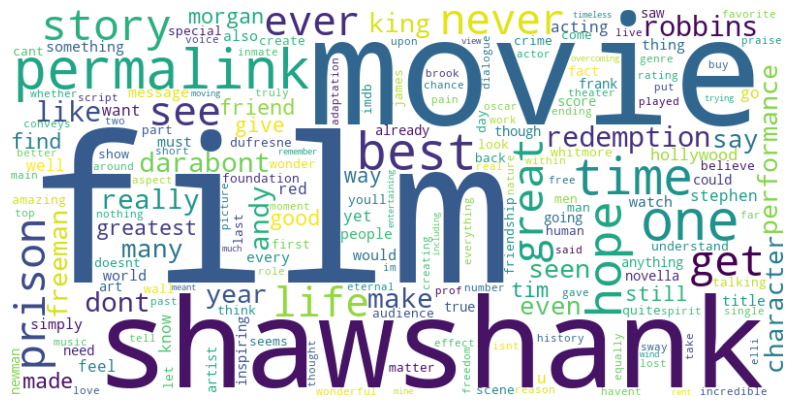

In [121]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(fdist)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [123]:
#Generating bigrams

In [125]:
from nltk.util import ngrams

bigrams = list(ngrams(clean_tokens, 2))
bigram_frequencies = FreqDist(bigrams)

print(bigram_frequencies.most_common(10))

[(('shawshank', 'redemption'), 10), (('tim', 'robbins'), 9), (('morgan', 'freeman'), 8), (('one', 'best'), 8), (('stephen', 'king'), 7), (('best', 'film'), 5), (('frank', 'darabont'), 5), (('really', 'make'), 4), (('andy', 'dufresne'), 4), (('james', 'whitmore'), 4)]


In [127]:
#Sentiment labelling

In [129]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dell\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [131]:
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd

sia = SentimentIntensityAnalyzer()

df_cleaned = pd.DataFrame({'Review_text': cleaned_reviews})
def get_sentiment_score(text):
    scores = sia.polarity_scores(text)
   
    if scores['compound'] >= 0.05:
        return 'positive'
    elif scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df_cleaned['Sentiment'] = df_cleaned['Review_text'].apply(get_sentiment_score)

print(df_cleaned.head())

                                         Review_text Sentiment
0  bird arent meant cagedspoilerhitchcockthelegen...   neutral
1  incredible movie one life youit wonder film hi...  positive
2  dont rent shawshankim trying save money last f...  positive
3  classic piece unforgettable filmmakingspoilerk...   neutral
4  movie madethis movie ordinary hollywood flick ...  positive


In [133]:
#Feature engineering

In [135]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

df_cleaned['Sentiment'] = label_encoder.fit_transform(df_cleaned['Sentiment'])

X = df_cleaned['Review_text']
y = df_cleaned['Sentiment']

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df_cleaned['Review_text']).toarray()
y = df_cleaned['Sentiment']

In [137]:
#Model selection and training

In [139]:
X_train, X_val, y_train, y_val = train_test_split(
    X_tfidf, 
    y, 
    test_size=0.2, 
    stratify=y,
    random_state=42)

In [141]:
#Logistic Regression

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

y_pred_log_reg = log_reg_model.predict(X_val)
print("Logistic Regression Performance:")
print(classification_report(y_val, y_pred_log_reg,zero_division=1))

Logistic Regression Performance:
              precision    recall  f1-score   support

           1       1.00      0.00      0.00         1
           2       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.90      0.50      0.44         5
weighted avg       0.84      0.80      0.71         5



In [145]:
#Naive Bayes

In [147]:
from sklearn.naive_bayes import MultinomialNB

nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_val)
print("Naive Bayes Performance:")
print(classification_report(y_val, y_pred_nb,zero_division=1))

Naive Bayes Performance:
              precision    recall  f1-score   support

           1       1.00      0.00      0.00         1
           2       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.90      0.50      0.44         5
weighted avg       0.84      0.80      0.71         5



In [149]:
#Support Vector Machine (SVM)

In [151]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1, random_state=42)
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_val)
print("SVM Performance:")
print(classification_report(y_val, y_pred_svm,zero_division=1))

SVM Performance:
              precision    recall  f1-score   support

           1       1.00      0.00      0.00         1
           2       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.90      0.50      0.44         5
weighted avg       0.84      0.80      0.71         5



In [153]:
#Random Forest

In [157]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_val)
print("Random Forest Performance:")
print(classification_report(y_val, y_pred_rf,zero_division=1))

Random Forest Performance:
              precision    recall  f1-score   support

           1       1.00      0.00      0.00         1
           2       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.90      0.50      0.44         5
weighted avg       0.84      0.80      0.71         5



In [159]:
#XGBoost

In [161]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

y_pred_xgb = xgb_model.predict(X_val)
print("XGBoost Performance:")
print(classification_report(y_val, y_pred_xgb,zero_division=1))

XGBoost Performance:
              precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       1.00      0.00      0.00         1
           2       0.75      0.75      0.75         4

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.25         5
weighted avg       0.80      0.60      0.60         5



In [163]:
#Hyperparameter Tuning: Logistic Regression (using GridSearchCV)

In [165]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga']
}
grid_search_log_reg = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, n_jobs=-1)
grid_search_log_reg.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", grid_search_log_reg.best_params_)
y_pred_log_reg_best = grid_search_log_reg.best_estimator_.predict(X_val)
print("GridSearchCV Logistic Regression Performance:")
print(classification_report(y_val, y_pred_log_reg_best,zero_division=1))

C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for Logistic Regression: {'C': 0.1, 'solver': 'liblinear'}
GridSearchCV Logistic Regression Performance:
              precision    recall  f1-score   support

           1       1.00      0.00      0.00         1
           2       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.90      0.50      0.44         5
weighted avg       0.84      0.80      0.71         5



In [167]:
#Hyperparameter Tuning: Random Forest (using RandomizedSearchCV)

In [169]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist_rf = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 10)
}

random_search_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_dist_rf, n_iter=10, cv=5, n_jobs=-1, random_state=42)
random_search_rf.fit(X_train, y_train)

print("Best parameters for Random Forest:", random_search_rf.best_params_)
y_pred_rf_best = random_search_rf.best_estimator_.predict(X_val)
print("RandomizedSearchCV Random Forest Performance:")
print(classification_report(y_val, y_pred_rf_best,zero_division=1))

C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for Random Forest: {'max_depth': 9, 'min_samples_split': 5, 'n_estimators': 142}
RandomizedSearchCV Random Forest Performance:
              precision    recall  f1-score   support

           1       1.00      0.00      0.00         1
           2       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.90      0.50      0.44         5
weighted avg       0.84      0.80      0.71         5



In [171]:
#Hyperparameter Tuning: XGBoost (using GridSearchCV)

In [173]:
param_grid_xgb = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'n_estimators': [50, 100, 200]
}

grid_search_xgb = GridSearchCV(XGBClassifier(eval_metric='logloss', random_state=42), param_grid_xgb, cv=5, n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

print("Best parameters for XGBoost:", grid_search_xgb.best_params_)
y_pred_xgb_best = grid_search_xgb.best_estimator_.predict(X_val)
print("GridSearchCV XGBoost Performance:")
print(classification_report(y_val, y_pred_xgb_best,zero_division=1))

C:\Users\dell\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for XGBoost: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 50}
GridSearchCV XGBoost Performance:
              precision    recall  f1-score   support

           0       0.00      1.00      0.00         0
           1       1.00      0.00      0.00         1
           2       0.75      0.75      0.75         4

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.25         5
weighted avg       0.80      0.60      0.60         5



In [175]:
#Model Evaluation

In [177]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model_performance = {}

def evaluate_model(model, model_name):
    y_pred = model.predict(X_val)
    print(f"Performance of {model_name}:")
    print(classification_report(y_val, y_pred, zero_division=1))
    model_performance[model_name] = classification_report(y_val, y_pred, output_dict=True,zero_division=1)

evaluate_model(log_reg_model, "Logistic Regression")
evaluate_model(nb_model, "Naive Bayes")
evaluate_model(svm_model, "SVM")
evaluate_model(rf_model, "Random Forest")
evaluate_model(xgb_model, "XGBoost")

print("\nModel Performance Summary:")
for model_name, metrics in model_performance.items():
    print(f"{model_name}:")
    print(f"Accuracy: {metrics['accuracy']:.4f}")
    print(f"Weighted F1-Score: {metrics['weighted avg']['f1-score']:.4f}\n")

Performance of Logistic Regression:
              precision    recall  f1-score   support

           1       1.00      0.00      0.00         1
           2       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.90      0.50      0.44         5
weighted avg       0.84      0.80      0.71         5

Performance of Naive Bayes:
              precision    recall  f1-score   support

           1       1.00      0.00      0.00         1
           2       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.90      0.50      0.44         5
weighted avg       0.84      0.80      0.71         5

Performance of SVM:
              precision    recall  f1-score   support

           1       1.00      0.00      0.00         1
           2       0.80      1.00      0.89         4

    accuracy                           0.80         5
   macro avg       0.90      0.50      0.44 

In [179]:
#Serialize model (Logistic Regression)

In [181]:
import joblib

joblib.dump(log_reg_model, "logistic_regression_model.pkl")
joblib.dump(tfidf_vectorizer, "tfidf_vectorizer.pkl")
joblib.dump(label_encoder, 'label_encoder.pkl')

print("Model,vectorizer and label encoder saved!")

Model,vectorizer and label encoder saved!
